In [383]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from IPython.display import display, Markdown
az.style.use('arviz-darkgrid')
import numpy as np
np.random.seed(44)

In [332]:
df = pd.read_csv("../data/processed.csv")

In [333]:
df

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0          AFG  Afghanistan  1900                   NaN                   NaN   
1          AFG  Afghanistan  1901                   NaN                 0.000   
2          AFG  Afghanistan  1902                   NaN                 0.000   
3          AFG  Afghanistan  1903                   NaN                 0.000   
4          AFG  Afghanistan  1904                   NaN                 0.000   
...        ...          ...   ...                   ...                   ...   
17427      ZWE     Zimbabwe  2015               -25.013               -10.847   
17428      ZWE     Zimbabwe  2016               -37.694               -12.257   
17429      ZWE     Zimbabwe  2017                 8.375                 1.697   
17430      ZWE     Zimbabwe  2018                22.555                 4.952   
17431      ZWE     Zimbabwe  2019               -35.015                -9.422   

       gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                      NaN                  NaN                  NaN   
1                      NaN                  NaN                  NaN   
2                      NaN                  NaN                  NaN   
3                      NaN                  NaN                  NaN   
4                      NaN                  NaN                  NaN   
...                    ...                  ...                  ...   
17427                  NaN                  NaN                  NaN   
17428                  NaN                  NaN                  NaN   
17429                  NaN                  NaN                  NaN   
17430                  NaN                  NaN                  NaN   
17431                  NaN                  NaN                  NaN   

       oil_prod_change_twh  energy_cons_change_pct  ...  \
0                      NaN                     NaN  ...   
1                      NaN                     NaN  ...   
2                      NaN                     NaN  ...   
3                      NaN                     NaN  ...   
4                      NaN                     NaN  ...   
...                    ...                     ...  ...   
17427                  NaN                  -0.789  ...   
17428                  NaN                 -14.633  ...   
17429                  NaN                     NaN  ...   
17430                  NaN                     NaN  ...   
17431                  NaN                     NaN  ...   

       solar_elec_per_capita  solar_energy_per_capita           gdp  \
0                        NaN                      NaN           NaN   
1                        NaN                      NaN           NaN   
2                        NaN                      NaN           NaN   
3                        NaN                      NaN           NaN   
4                        NaN                      NaN           NaN   
...                      ...                      ...           ...   
17427                  0.579                      NaN  2.503057e+10   
17428                  0.641                      NaN  2.515176e+10   
17429                  0.773                      NaN           NaN   
17430                  0.970                      NaN           NaN   
17431                  0.956                      NaN           NaN   

       wind_share_elec  wind_cons_change_pct  wind_share_energy  \
0                  NaN                   NaN                NaN   
1                  NaN                   NaN                NaN   
2                  NaN                   NaN                NaN   
3                  NaN                   NaN                NaN   
4                  NaN                   NaN                NaN   
...                ...                   ...                ...   
17427              0.0                   NaN                NaN   
17428              0.0                   NaN                NaN   
174

In [334]:
energy = pd.DataFrame()

energy["country"] = df["country"].astype("category")
countries = list(energy["country"].cat.categories) 

In [335]:
energy = energy.drop_duplicates()

In [336]:
continent_names = ["Africa", "Europe", "Oceania", "Asia", "North America", "South America"]

In [337]:
energy[energy["country"] == "Italy"]

country
7930   Italy

In [338]:
Africa = ['Kenya', 'South Africa', 'Nigeria', 'Algeria', 'Egypt', 'Mozambique', 'Morocco', 'Ghana', 'Botswana', 'Madagascar', 'Ethiopia', 'Zimbabwe', 'Tunisia', 'Rwanda', 'Uganda', 'United Republic of Tanzania', 'Cameroon', 'Angola', 'Libyan Arab Jamahiriya', 'Democratic Republic of the Congo', "Côte d'Ivoir", 'Central African Republic', 'Burundi', 'Bolivia', 'Mauritius', 'Somalia', 'Sudan', 'Lesotho', 'Namibia', 'Gabon', 'Swaziland', 'Senegal', 'Malawi', 'Benin', 'Guinea', 'Gambia', 'Sierra Leone', 'Togo', 'Zambia', 'Burkina Faso', 'Congo', 'Niger', 'Eritrea', 'Mauritania', 'Mali', 'Liberia', 'Cape Verde', 'Djibouti']
Europe = ["United Kingdom", "Netherlands", "Poland", "Germany", 'Croatia', 'Greece', 'France', 'Ukraine', 'Ireland', 'Romania', 'Spain', 'Belgium', 'Latvia', 'Czech Republic', 'Italy', 'Austria', 'Denmark', 'Finland', 'Russian Federation', 'Bulgaria', 'Portugal', 'Turkey', 'Slovakia', 'Norway', 'Hungary', 'Switzerland', 'Bosnia and Herzegovina', 'Serbia', 'Lithuania', 'Belarus', 'Estonia', 'Malta', 'Albania', 'The former Yugoslav Republic of Macedonia', 'Luxembourg', 'San Marino', 'Liechtenstein', 'Montenegro', 'Sweden', 'Georgia', 'Slovenia', 'Republic of Moldova', 'Azerbaijan', 'Cyprus', 'Andorra', 'Monaco']
Oceania = ['Australia', 'New Zealand', 'Micronesia', 'Fiji', 'Marshall Islands', 'Palau', 'Solomon Islands', 'Nauru']
Asia = ['India', 'Israel', 'Indonesia', 'China', 'Japan', 'Iran', 'Nepal', 'Pakistan', 'Bangladesh', 'Jordan', 'Viet Nam', 'Thailand', 'Malaysia', 'Lebanon', 'South Korea', 'Hong Kong (S.A.R.)', 'Myanmar', 'Armenia', 'Kazakhstan', 'United Arab Emirates', 'Singapore', 'Sri Lanka', 'Cambodia', 'Taiwan', 'Philippines', 'Qatar', 'Bahrain', 'Afghanistan', 'Republic of Korea', 'Uzbekistan', 'Yemen', 'Oman', 'Bhutan', 'Syrian Arab Republic', 'Mongolia', 'Iraq', 'Kuwait', 'Maldives', 'Turkmenistan', 'Kyrgyzstan', 'Tajikistan', 'North Korea', "Democratic People's Republic of Korea", 'Timor-Leste', 'Brunei Darussalam']
North_America = ['United States', 'Dominican Republic', 'Canada', 'Mexico', 'El Salvador', 'Costa Rica', 'Nicaragua', 'Cuba', 'Guatemala', 'Jamaica', 'Panama', 'Barbados', 'Antigua and Barbuda', 'Haiti', 'Bahamas', 'Grenada', 'Belize', 'Dominica', 'Saint Lucia']
South_America = ['chile', 'Argentina', 'Colombia', 'Brazil', 'Paraguay', 'Uruguay', 'Peru', 'Venezuela', 'Honduras', 'Ecuador', 'Trinidad and Tobago', 'Suriname', 'Guyana']

In [339]:
continents = [Africa, Europe, Oceania, Asia, North_America, South_America]

In [340]:
continents_dict = {}

In [341]:
for idx in range(len(continents)):
    continents_dict[continent_names[idx]] = df[df["country"].isin(continents[idx])]

In [342]:
df_sa = pd.DataFrame(continents_dict["South America"])
df_sa[(df_sa["year"] == 2018) & (~df_sa["renewables_energy_per_capita"].isna())]

iso_code              country  year  coal_prod_change_pct  \
798        ARG            Argentina  2018                 0.000   
2232       BRA               Brazil  2018                 8.369   
3584       COL             Colombia  2018                -6.919   
4859       ECU              Ecuador  2018                   NaN   
12580      PER                 Peru  2018                 0.000   
15556      TTO  Trinidad and Tobago  2018                   NaN   
16686      VEN            Venezuela  2018               -48.979   

       coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  \
798                     NaN                6.125               22.755   
2232                  2.120               -7.428              -20.191   
3584                -50.052                4.627                5.686   
4859                    NaN                  NaN                  NaN   
12580                   NaN               -1.708               -2.222   
15556                   NaN                6.552               20.882   
16686                -1.650              -18.097              -69.863   

       oil_prod_change_pct  oil_prod_change_twh  energy_cons_change_pct  ...  \
798                  1.109                3.509                  -0.730  ...   
2232                -1.471              -24.306                   0.585  ...   
3584                 1.340                6.997                   0.716  ...   
4859                -2.649               -8.758                   5.637  ...   
12580               12.211                8.087                   4.919  ...   
15556              -10.941               -5.564                  -5.306  ...   
16686              -29.703             -371.043                 -14.049  ...   

       solar_elec_per_capita  solar_energy_per_capita  gdp  wind_share_elec  \
798                    2.435                    6.058  NaN            1.013   
2232                  16.523                   41.070  NaN            8.194   
3584                   0.423                    0.601  NaN            0.055   
4859                   2.224                    5.540  NaN            0.280   
12580                 23.446                   57.914  NaN            2.815   
15556                  3.597                    8.350  NaN            0.000   
16686                  0.208                    0.765  NaN            0.073   

       wind_cons_change_pct  wind_share_energy  wind_cons_change_twh  \
798                 129.653              0.357                 1.982   
2232                 13.731              3.574                14.546   
3584               1694.380              0.027                 0.130   
4859                  8.704              0.099                 0.016   
12580                39.147              1.178                 1.051   
15556                   NaN              0.000                 0.000   
16686                   NaN              0.000                 0.000   

       wind_consumption  wind_elec_per_capita  wind_energy_per_capita  
798               3.511                31.852                  79.151  
2232            120.479               231.419                 575.165  
3584              0.138                 0.866                   2.774  
4859              0.199                 4.683                  11.676  
12580             3.734                46.954                 116.732  
15556             0.000                 0.000                   0.000  
16686             0.000                 2.458                   0.000  

[7 rows x 122 columns]

In [343]:
len(continents_dict["South America"]["country"].value_counts())

12

In [344]:
def preprocessing(df, year=2018):
    new_df = df[df["year"] == year]
    new_df.insert(1, "continent", np.nan)
    

In [345]:
len(South_America)

13

In [346]:
new_df = pd.DataFrame()

In [347]:
new_df = df[df["year"] == 2018]

In [348]:
new_df.insert(1, "continent", np.nan)

In [349]:
new_df

iso_code  continent         country  year  coal_prod_change_pct  \
118         AFG        NaN     Afghanistan  2018                   NaN   
238         NaN        NaN          Africa  2018                 2.823   
358         ALB        NaN         Albania  2018                   NaN   
478         DZA        NaN         Algeria  2018                 0.000   
518         ASM        NaN  American Samoa  2018                   NaN   
...         ...        ...             ...   ...                   ...   
16902       ESH        NaN  Western Sahara  2018                   NaN   
17022  OWID_WRL        NaN           World  2018                 5.028   
17073       YEM        NaN           Yemen  2018                   NaN   
17310       ZMB        NaN          Zambia  2018                 0.000   
17430       ZWE        NaN        Zimbabwe  2018                22.555   

       coal_prod_change_twh  gas_prod_change_pct  gas_prod_change_twh  \
118                     NaN                  NaN                  NaN   
238                  52.095                5.381              120.640   
358                     NaN                  NaN                  NaN   
478                     NaN                0.933                8.672   
518                     NaN                  NaN                  NaN   
...                     ...                  ...                  ...   
16902                   NaN                  NaN                  NaN   
17022              2195.175                5.037             1849.829   
17073                   NaN               -4.654               -0.280   
17310                   NaN                  NaN                  NaN   
17430                 4.952                  NaN                  NaN   

       oil_prod_change_pct  oil_prod_change_twh  ...  solar_elec_per_capita  \
118                    NaN                  NaN  ...                  0.995   
238                  2.528              112.961  ...                  7.720   
358                    NaN                  NaN  ...                  0.347   
478                 -1.975              -15.280  ...                 14.280   
518                    NaN                  NaN  ...                  0.000   
...                    ...                  ...  ...                    ...   
16902                  NaN                  NaN  ...                  0.000   
17022                2.414             1231.381  ...                 75.075   
17073               18.519                6.354  ...                 16.071   
17310                  NaN                  NaN  ...                  0.022   
17430                  NaN                  NaN  ...                  0.970   

       solar_energy_per_capita  gdp  wind_share_elec  wind_cons_change_pct  \
118                        NaN  NaN            0.000                   NaN   
238                     19.187  NaN            1.689                14.015   
358                        NaN  NaN            0.000                   NaN   
478                     35.490  NaN            0.015               -47.676   
518                        NaN  NaN            0.000                   NaN   
...                        ...  ...              ...                   ...   
16902                      NaN  NaN              NaN                   NaN   
17022                  189.798  NaN            4.953                10.672   
17073                      NaN  NaN            0.000                   NaN   
17310                      NaN  NaN            0.000                   NaN   
17430                      NaN  NaN            0.000                   NaN   

       wind_share_energy  wind_cons_change_twh  wind_consumption  \
118                  NaN                   NaN               NaN   
238                0.659                 4.365            35.511   
358                  NaN                   NaN               NaN   
478                0.004                -0.023             0.025   
518            

In [350]:
def assign_continents(df):
    for index, row in df.iterrows():
        continent = np.nan
        if row.country in Africa:
            continent = "Africa"
        elif row.country in Europe:
            continent = "Europe"
        elif row.country in South_America:
            continent = "South America"
        elif row.country in North_America:
            continent = "North America"
        elif row.country in Oceania:
            continent = "Oceania"
        elif row.country in Asia:
            continent = "Asia"
        df.loc[index, 'continent'] = continent
    return df

In [351]:
new_df = assign_continents(new_df)

In [352]:
new_df = new_df.dropna(subset=['continent'])

In [353]:
final_df = new_df[["continent", "country", "renewables_elec_per_capita", "fossil_cons_per_capita"]]

In [354]:
final_df = final_df.dropna()

In [355]:
final_df["continent"].value_counts()

Africa           42
Europe           38
Asia             37
North America    19
South America    12
Oceania           5
Name: continent, dtype: int64

In [356]:
candidates = []
for column in new_df.columns:
    nans = new_df[column].isna().sum()
    if nans < 10:
        candidates.append((column, nans))
#candidates

In [357]:
final_df

continent              country  renewables_elec_per_capita  \
118             Asia          Afghanistan                      25.960   
358           Europe              Albania                    2937.038   
478           Africa              Algeria                      17.283   
638           Africa               Angola                     287.720   
678    North America  Antigua and Barbuda                     136.177   
...              ...                  ...                         ...   
16526           Asia           Uzbekistan                     179.975   
16686  South America            Venezuela                    1995.552   
17073           Asia                Yemen                      16.071   
17310         Africa               Zambia                     785.775   
17430         Africa             Zimbabwe                     360.205   

       fossil_cons_per_capita  
118                     4.035  
358                     0.000  
478                  1689.097  
638                    91.559  
678                  3385.417  
...                       ...  
16526                1649.805  
16686                1350.760  
17073                 103.931  
17310                 135.214  
17430                 272.319  

[153 rows x 4 columns]

In [358]:
final_df = final_df[~((final_df["renewables_elec_per_capita"] == 0) | (final_df["fossil_cons_per_capita"] == 0))]

In [359]:
final_df = final_df.rename(columns={"renewables_elec_per_capita": "renewables_cons", "fossil_cons_per_capita": "fossil_cons"})

In [360]:
final_df.to_csv("processed.csv")

# Research questions 


*   What’s the typical energy consumption of a nation? X


*   How does the consumption vary from continent to continent?


*   For any single continent, how much does the energy consumption vary from nation to nation?   X

We make the hypothesis that the proportion of renewable energy in the total consumption of electricity is different between continents

In [321]:
df_2017 = df[df["year"] == 2017]
df_2017.insert(1, "continent", np.nan)
df_2017 = assign_continents(df_2017)
df_2017 = df_2017.dropna(subset=['continent'])
df_2017 = df_2017[["continent", "country", "renewables_elec_per_capita", "fossil_cons_per_capita"]]
df_2017 = df_2017.dropna()
df_2017 = df_2017[~((df_2017["renewables_elec_per_capita"] == 0) | (df_2017["fossil_cons_per_capita"] == 0))]
df_2017 = df_2017.rename(columns={"renewables_elec_per_capita": "renewables_cons", "fossil_cons_per_capita": "fossil_cons"})

In [322]:
df_2017.to_csv("df_2017.csv")

In [323]:
df_2017

continent              country  renewables_cons  fossil_cons
117             Asia          Afghanistan           29.976        4.629
477           Africa              Algeria           15.353     1712.050
637           Africa               Angola          261.395       96.658
677    North America  Antigua and Barbuda           64.653     3400.000
797    South America            Argentina          761.914     2253.587
...              ...                  ...              ...          ...
16525           Asia           Uzbekistan          261.242     1555.588
16685  South America            Venezuela         2039.995     1380.907
17072           Asia                Yemen            6.574      139.337
17309         Africa               Zambia          738.356      110.821
17429         Africa             Zimbabwe          287.350      226.070

[149 rows x 4 columns]

## Hypothesis 1

We assume that the consumption of renewable energy in Europe has increased from 2017 to 2018

In [361]:
df_2018 = final_df

In [362]:
df_2017_eu = df_2017[df_2017["continent"] == "Europe"]
df_2018_eu = df_2018[df_2018["continent"] == "Europe"]

In [363]:
renewable_mean_2017 = df_2017_eu['renewables_cons'].mean()
renewable_std_2017 = df_2017_eu['renewables_cons'].std()
renewable_mean_2018 = df_2018_eu['renewables_cons'].mean()
renewable_std_2018 = df_2018_eu['renewables_cons'].std()

In [391]:
# Create two models, one with a mean of renewable_mean_2017 and another with a mean of renewable_mean_2018
with pm.Model() as model_2017:
    renewable_prior_2017 = pm.Normal("renewable_europe_2017",mu=renewable_mean_2017, sd=renewable_std_2017)
    likelihood_2017 = pm.Normal("likelihood_2017", mu=renewable_prior_2017, sd=renewable_std_2017, observed=df_2017_eu['renewables_cons'])
    trace_2017 = pm.sample(5000, tune=1000)
    
with pm.Model() as model_2018:
    renewable_prior_2018 = pm.Normal("renewable_europe_2018",mu=renewable_mean_2018, sd=renewable_std_2018)
    likelihood_2018 = pm.Normal("likelihood_2018", mu=renewable_prior_2018, sd=renewable_std_2018, observed=df_2018_eu['renewables_cons'])
    trace_2018 = pm.sample(5000, tune=1000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [renewable_europe_2017]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [renewable_europe_2018]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


Got error No model on context stack. trying to find log_likelihood in translation.
/home/lohacker91/anaconda3/envs/bayesian/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/home/lohacker91/anaconda3/envs/bayesian/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context s

array([[<AxesSubplot: title={'center': 'renewable_europe_2018'}>,
        <AxesSubplot: title={'center': 'renewable_europe_2018'}>]],
      dtype=object)

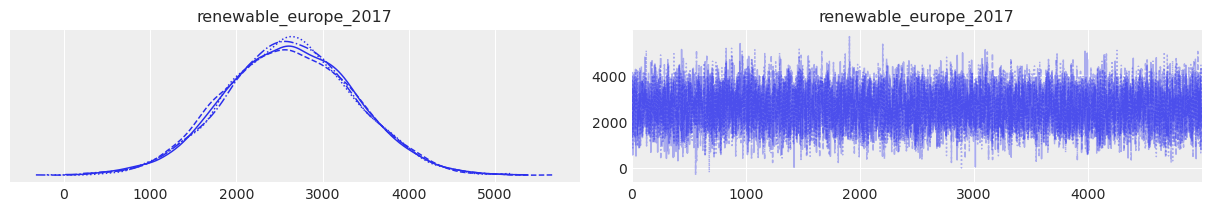

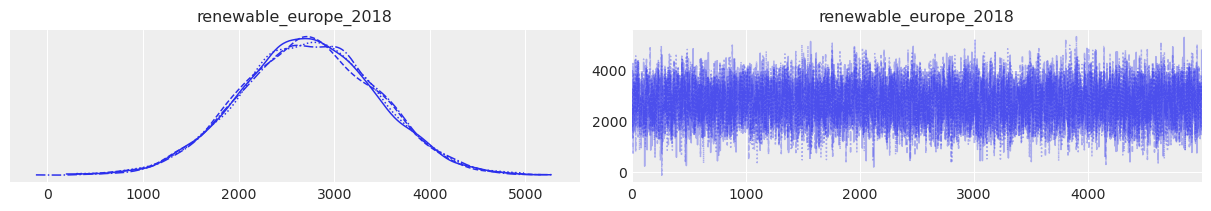

In [365]:
az.plot_trace(trace_2017)
az.plot_trace(trace_2018)

Got error No model on context stack. trying to find log_likelihood in translation.
/home/lohacker91/anaconda3/envs/bayesian/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


<AxesSubplot: title={'center': 'renewable_europe_2018'}>

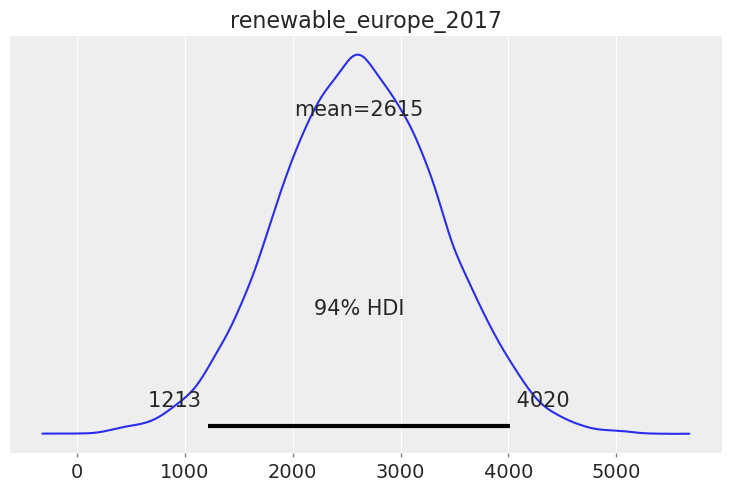

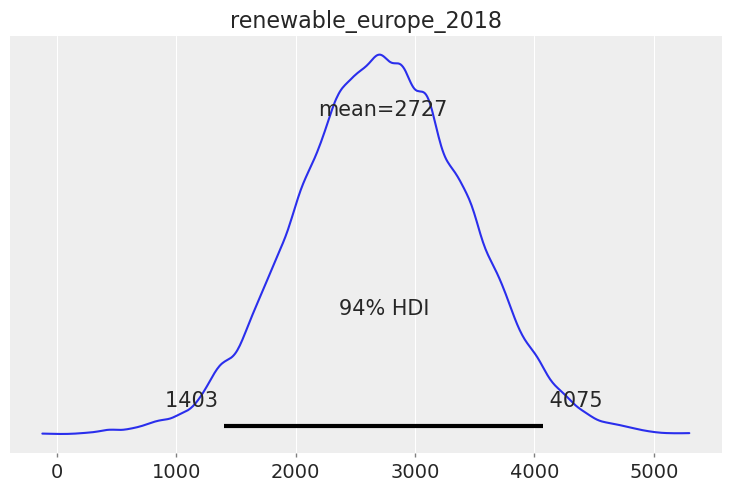

In [366]:
az.plot_posterior(trace_2017)
az.plot_posterior(trace_2018)

We can see that there was a slight increase in the consumption of renewable energy from 2017 to 2018. the 94% HDI range has slightly increased

In [389]:
# Create two models, one with a mean of renewable_mean_2017 and another with a mean of renewable_mean_2018
with pm.Model() as model_2017_new_prior:
    renewable_prior_2017 = pm.Normal("renewable_europe_2017",mu=renewable_mean_2017 + 500, sd=renewable_std_2017/2)
    likelihood_2017 = pm.Normal("likelihood_2017", mu=renewable_prior_2017, sd=renewable_std_2017, observed=df_2017_eu['renewables_cons'])
    trace_2017_new_prior = pm.sample(5000, tune=1000)
    
with pm.Model() as model_2017_new_prior:
    renewable_prior_2018 = pm.Normal("renewable_europe_2018",mu=renewable_mean_2018 + 500, sd=renewable_std_2018/2)
    likelihood_2018 = pm.Normal("likelihood_2018", mu=renewable_prior_2018, sd=renewable_std_2018, observed=df_2018_eu['renewables_cons'])
    trace_2018_new_prior = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [renewable_europe_2017]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [renewable_europe_2018]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


In [392]:
a = az.summary(trace_2017)
b = az.summary(trace_2018)
c = az.summary(trace_2017_new_prior)
d = az.summary(trace_2018_new_prior)
pd.concat([a, b, c, d])

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


mean       sd    hdi_3%   hdi_97%  mcse_mean  \
renewable_europe_2017  2619.518  747.184  1245.081  4029.560      8.264   
renewable_europe_2018  2737.384  727.164  1353.489  4085.478      7.811   
renewable_europe_2017  2652.330  716.580  1338.424  4019.290      7.572   
renewable_europe_2018  2796.692  698.481  1465.111  4101.020      7.477   

                       mcse_sd  ess_bulk  ess_tail  r_hat  
renewable_europe_2017    5.844    8182.0   13456.0    1.0  
renewable_europe_2018    5.524    8659.0   14130.0    1.0  
renewable_europe_2017    5.355    8950.0   14234.0    1.0  
renewable_europe_2018    5.287    8721.0   12543.0    1.0

We can See that even by changing our priors, we always have an overall increase in consumption of renewable electricity.

## Hypothesis 2

We assume that in 2018 Asia has used more fossil electricity per capita than Europe

In [442]:
df_asia = df_2018[df_2018['continent'] == "Asia"]
df_europe = df_2018[df_2018['continent'] == "Europe"]

In [443]:
mu_asia = df_asia["fossil_cons"].mean()
sd_asia = df_asia["fossil_cons"].std()
mu_europe = df_europe["fossil_cons"].mean()
sd_europe = df_europe["fossil_cons"].std()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [europe_prior, asia_prior]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.
/tmp/ipykernel_4523/3890039082.py:10: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_comp)


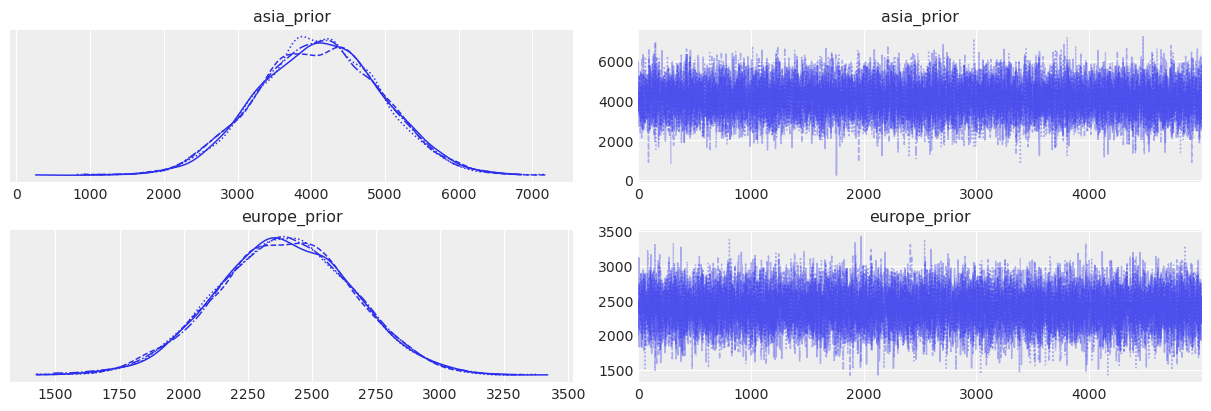

In [444]:
with pm.Model() as model:
    asia_prior = pm.Normal('asia_prior', mu=mu_asia, sd=sd_asia)
    europe_prior = pm.Normal('europe_prior', mu=mu_europe, sd=sd_europe)
    
    asia_likelihood = pm.Normal('asia_likelihood', mu=asia_prior, sd=sd_asia, observed=df_asia["fossil_cons"])
    europe_likelihood = pm.Normal('europe_likelihood', mu=europe_prior, sd=sd_europe, observed=df_europe["fossil_cons"])
    
    trace_comp = pm.sample(5000, tune=1000)
    
    pm.traceplot(trace_comp)

Got error No model on context stack. trying to find log_likelihood in translation.


array([<AxesSubplot: title={'center': 'asia_prior'}>,
       <AxesSubplot: title={'center': 'europe_prior'}>], dtype=object)

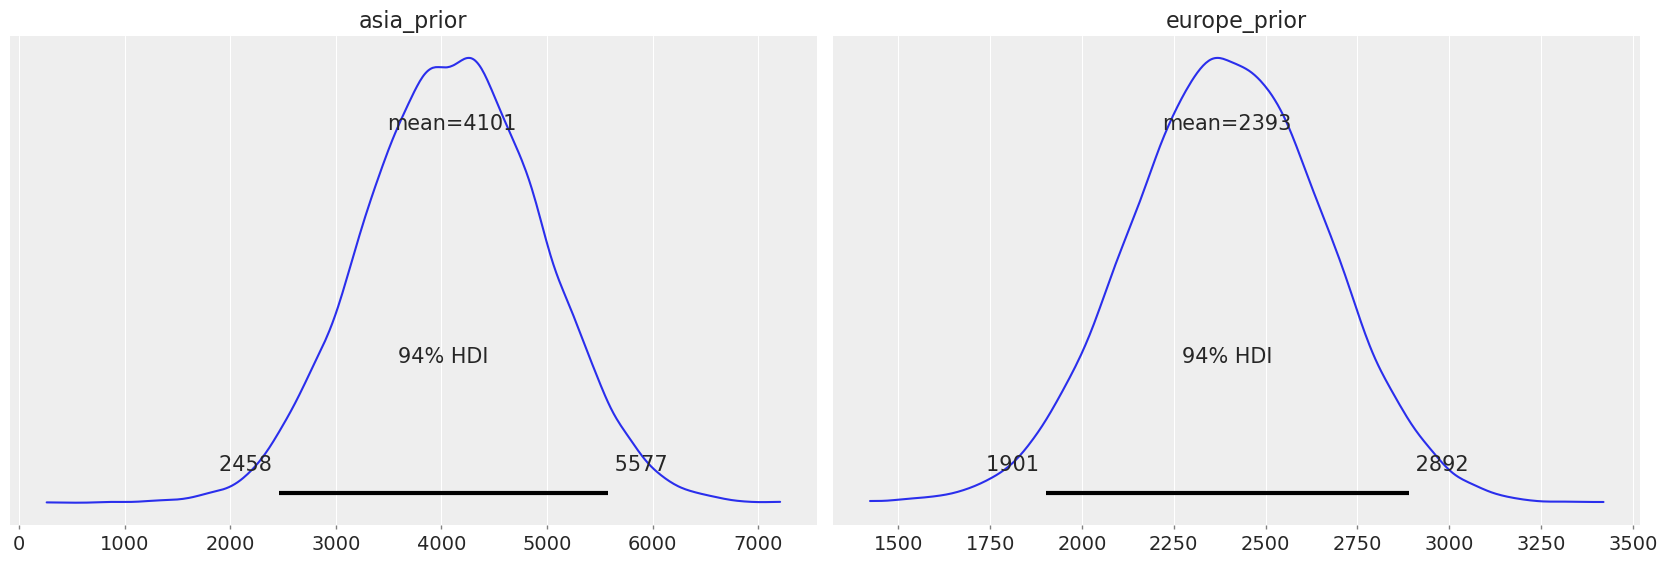

In [445]:
az.plot_posterior(trace_comp)

In [446]:
with pm.Model() as model:
    asia_new_prior = pm.Normal('asia_prior_new', mu=mu_asia + 1000, sd=sd_asia * 3)
    europe_new_prior = pm.Normal('europe_prior_new', mu=mu_europe - 1000, sd=sd_europe/2)
    
    asia_likelihood = pm.Normal('asia_likelihood', mu=asia_new_prior, sd=sd_asia * 3, observed=df_asia["fossil_cons"])
    europe_likelihood = pm.Normal('europe_likelihood', mu=europe_new_prior, sd=sd_europe/2, observed=df_europe["fossil_cons"])
    
    trace_new_prior = pm.sample(5000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [europe_prior_new, asia_prior_new]


Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 2 seconds.


In [447]:
a = az.summary(trace_comp)
b = az.summary(trace_new_prior)
pd.concat([a, b])

Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.


mean        sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  \
asia_prior        4100.572   834.523  2458.434  5577.278      6.217    4.422   
europe_prior      2392.858   264.872  1901.340  2891.620      1.970    1.393   
asia_prior_new    4096.810  2514.560  -572.967  8827.317     18.369   13.732   
europe_prior_new  2370.184   132.330  2122.367  2615.042      1.002    0.708   

                  ess_bulk  ess_tail  r_hat  
asia_prior         18013.0   13600.0    1.0  
europe_prior       18085.0   13834.0    1.0  
asia_prior_new     18734.0   14347.0    1.0  
europe_prior_new   17454.0   14324.0    1.0